In [1]:
import cv2
import numpy as np
import scipy
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

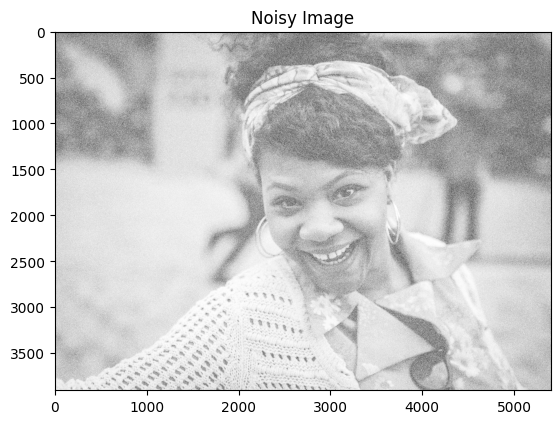

In [2]:
def add_guassian_noise(image, mean = 0, std = 25):
    noise = np.random.normal(mean,std,image.shape).astype(np.uint8)
    noisy_image = cv2.add(image,noise)
    return noisy_image

# Load image
image = cv2.imread('anna.jpg',cv2.IMREAD_GRAYSCALE)
noisy_image = add_guassian_noise(image)

# Display the noisy image
plt.imshow(noisy_image, cmap ='gray')
plt.title('Noisy Image')
plt.show()

In [4]:
#Apply filters

#Gaussian Filter:
gaussian_filtered = cv2.GaussianBlur(noisy_image,(5,5),sigmaX=1)

#Median Filter:
median_filtered = cv2.medianBlur(noisy_image,5)

#Bilateral Filter:
bilateral_filtered = cv2.bilateralFilter(noisy_image,d=9,sigmaColor=75,sigmaSpace=75)


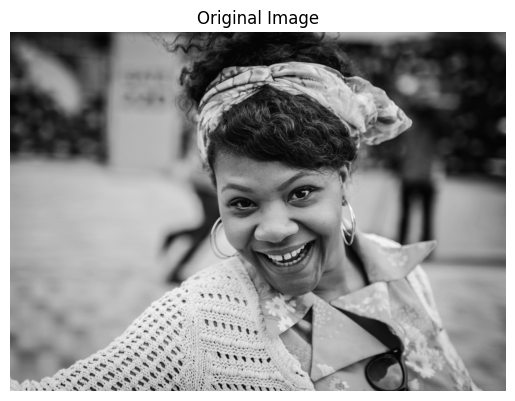

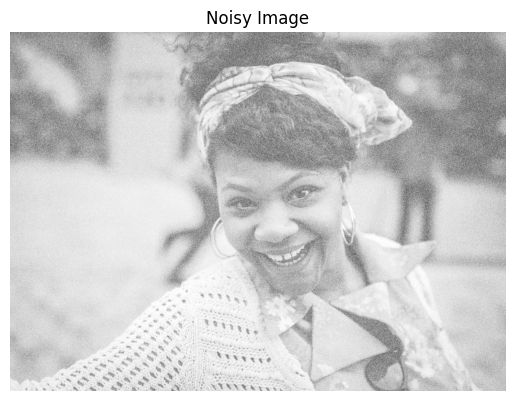

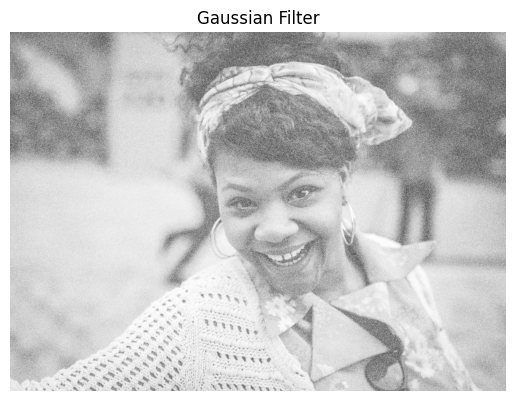

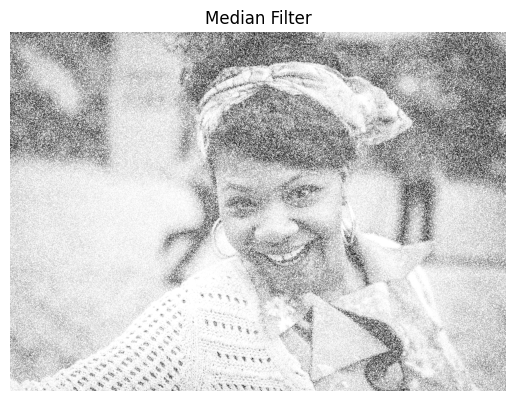

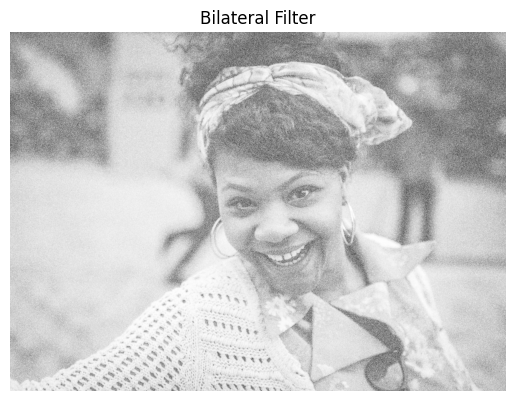

In [5]:
# Compare Results
filters = [("Original Image",image),("Noisy Image",noisy_image),("Gaussian Filter",gaussian_filtered),("Median Filter",median_filtered),("Bilateral Filter",bilateral_filtered)]

for title,img in filters:
    plt.figure()
    plt.title(title)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.show()    


In [15]:
# Evaluate Performance
# Metric 1: Mean Squared Error (MSE)
def mse(original, filtered):
    return np.mean((original - filtered) ** 2)

mse_gaussian = mse(image, gaussian_filtered)
mse_median = mse(image, median_filtered)
mse_bilateral = mse(image, bilateral_filtered)

print(f"MSE - Gaussian Filter: {mse_gaussian}")
print(f"MSE - Median Filter: {mse_median}")
print(f"MSE - Bilateral Filter: {mse_bilateral}")

MSE - Gaussian Filter: 112.8827490396927
MSE - Median Filter: 116.49590055484421
MSE - Bilateral Filter: 118.83407948024849


In [16]:
# Peak Signal-to-Noise Ratio (PSNR)

def psnr(original, filtered):
    mse_value = mse(original, filtered)
    if mse_value == 0:
        return float('inf')
    max_pixel = 255.0
    return 20 * np.log10(max_pixel / np.sqrt(mse_value))

psnr_gaussian = psnr(image, gaussian_filtered)
psnr_median = psnr(image, median_filtered)
psnr_bilateral = psnr(image, bilateral_filtered)

print(f"PSNR - Gaussian Filter: {psnr_gaussian}")
print(f"PSNR - Median Filter: {psnr_median}")
print(f"PSNR - Bilateral Filter: {psnr_bilateral}")

PSNR - Gaussian Filter: 27.604527835958265
PSNR - Median Filter: 27.467697178898625
PSNR - Bilateral Filter: 27.381393545009175
